In [3]:
import pandas as pd 

df = pd.read_csv('Simplified_PIT_data.csv')

df.head()

,CoC Number,CoC Name,Count Types,Year,Sheltered Total Homeless,Sheltered Total Homeless - Under 18,Sheltered Total Homeless - Age 18 to 24,Sheltered Total Homeless - Over 24,Sheltered Total Homeless - Female,Sheltered Total Homeless - Male,...,Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x),Unsheltered Homeless - Hispanic/Latin(o)(a)(x),Unsheltered Homeless - White,"Unsheltered Homeless - Black, African American, or African",Unsheltered Homeless - Asian or Asian American,"Unsheltered Homeless - American Indian, Alaska Native, or Indigenous",Unsheltered Homeless - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless - Multiple Races,Sheltered Total Homeless - Gender Questioning,Unsheltered Homeless - Gender Questioning
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,973,170,119,684,409,559,...,152,3,44,15,0,81,1,14,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,578,135,47,396,280,298,...,136,3,63,0,0,59,1,16,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,875,104,80,691,286,585,...,214,3,68,144,0,0,0,5,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,341,106,23,212,157,184,...,257,8,127,129,1,3,0,5,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,133,0,7,126,67,65,...,22,0,20,2,0,0,0,0,NaN,NaN


In [7]:
#Displays the data number and percent of unsheltered and sheltered people in Utah (Oregon and California as well)

# Extract state from CoC Number and group data by state and year
df['State'] = df['CoC Number'].str[:2]

# Filter for Utah data and group by year
utah_homeless = df[df['State'] == 'UT'].groupby('Year').agg({
    'Sheltered Total Homeless': 'sum',
    'Unsheltered Homeless': 'sum'
}).reset_index()

# Rename columns for clarity
utah_homeless = utah_homeless.rename(columns={
    'Sheltered Total Homeless': 'Sheltered',
    'Unsheltered Homeless': 'Unsheltered'
})

# Add percentage calculations
total_homeless = utah_homeless['Sheltered'] + utah_homeless['Unsheltered']
utah_homeless['Percent Sheltered'] = (utah_homeless['Sheltered'] / total_homeless * 100).round(2)
utah_homeless['Percent Unsheltered'] = (utah_homeless['Unsheltered'] / total_homeless * 100).round(2)

# Sort by year
utah_homeless = utah_homeless.sort_values('Year')

print("\nUtah Homeless Statistics by Year:")
print(utah_homeless)

# Filter for Oregon data and group by year
oregon_homeless = df[df['State'] == 'OR'].groupby('Year').agg({
    'Sheltered Total Homeless': 'sum',
    'Unsheltered Homeless': 'sum'
}).reset_index()

# Rename columns for clarity
oregon_homeless = oregon_homeless.rename(columns={
    'Sheltered Total Homeless': 'Sheltered',
    'Unsheltered Homeless': 'Unsheltered'
})

# Add percentage calculations
total_homeless = oregon_homeless['Sheltered'] + oregon_homeless['Unsheltered']
oregon_homeless['Percent Sheltered'] = (oregon_homeless['Sheltered'] / total_homeless * 100).round(2)
oregon_homeless['Percent Unsheltered'] = (oregon_homeless['Unsheltered'] / total_homeless * 100).round(2)

# Sort by year
oregon_homeless = oregon_homeless.sort_values('Year')

print("Oregon Homeless Statistics by Year:")
print(oregon_homeless)

# Filter for California data and group by year
california_homeless = df[df['State'] == 'CA'].groupby('Year').agg({
    'Sheltered Total Homeless': 'sum',
    'Unsheltered Homeless': 'sum'
}).reset_index()

# Rename columns for clarity
california_homeless = california_homeless.rename(columns={
    'Sheltered Total Homeless': 'Sheltered',
    'Unsheltered Homeless': 'Unsheltered'
})

# Add percentage calculations
total_homeless = california_homeless['Sheltered'] + california_homeless['Unsheltered']
california_homeless['Percent Sheltered'] = (california_homeless['Sheltered'] / total_homeless * 100).round(2)
california_homeless['Percent Unsheltered'] = (california_homeless['Unsheltered'] / total_homeless * 100).round(2)

# Sort by year
california_homeless = california_homeless.sort_values('Year')

print("\nCalifornia Homeless Statistics by Year:")
print(california_homeless)




Utah Homeless Statistics by Year:
   Year  Sheltered  Unsheltered  Percent Sheltered  Percent Unsheltered
0  2017       2574          278              90.25                 9.75
1  2018       2456          420              85.40                14.60
2  2019       2390          408              85.42                14.58
3  2020       2427          704              77.52                22.48
4  2021       2410         1155              67.60                32.40
5  2022       2684          873              75.46                24.54
Oregon Homeless Statistics by Year:
   Year  Sheltered  Unsheltered  Percent Sheltered  Percent Unsheltered
0  2017       5986         7967              42.90                57.10
1  2018       5551         8925              38.35                61.65
2  2019       5734        10142              36.12                63.88
3  2020       5778         8877              39.43                60.57
4  2021       5178         3870              57.23               

In [6]:
# Are there significant differences in the number of sheltered or unsheltered homeless individuals by gender in Utah?


import pandas as pd
from scipy.stats import ttest_rel

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Ensure 'CoC Number' is a string and normalize
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()

# Filter for rows where 'CoC Number' starts with 'UT-'
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()


# Convert relevant columns to numeric
columns_to_convert = [
    'Sheltered Total Homeless - Female', 
    'Sheltered Total Homeless - Male', 
    'Unsheltered Homeless - Female', 
    'Unsheltered Homeless - Male'
]
for col in columns_to_convert:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data in these columns
utah_df = utah_df.dropna(subset=columns_to_convert)

# Paired t-test for Sheltered Homeless (Female vs. Male)
sheltered_female = utah_df['Sheltered Total Homeless - Female']
sheltered_male = utah_df['Sheltered Total Homeless - Male']
sheltered_t_stat, sheltered_p_value = ttest_rel(sheltered_female, sheltered_male)

# Paired t-test for Unsheltered Homeless (Female vs. Male)
unsheltered_female = utah_df['Unsheltered Homeless - Female']
unsheltered_male = utah_df['Unsheltered Homeless - Male']
unsheltered_t_stat, unsheltered_p_value = ttest_rel(unsheltered_female, unsheltered_male)

# Print results
print("\nSheltered Homeless - Female vs. Male")
print(f"T-statistic: {sheltered_t_stat}")
print(f"P-value: {sheltered_p_value}\n")

print("Unsheltered Homeless - Female vs. Male")
print(f"T-statistic: {unsheltered_t_stat}")
print(f"P-value: {unsheltered_p_value}")




Sheltered Homeless - Female vs. Male
T-statistic: -2.4452440674584346
P-value: 0.02830155170022665

Unsheltered Homeless - Female vs. Male
T-statistic: -5.91471421109696
P-value: 3.7707013150294354e-05


In [8]:
# Utah is the higher than the national average 

# Calculate state means
state_homeless = df.groupby('State').agg({
    'Sheltered Total Homeless': 'mean',
    'Unsheltered Homeless': 'mean'
}).reset_index()

# Rename columns for clarity
state_homeless = state_homeless.rename(columns={
    'Sheltered Total Homeless': 'Sheltered Mean',
    'Unsheltered Homeless': 'Unsheltered Mean'
})

# Sort states alphabetically
state_homeless = state_homeless.sort_values('State')

# print("\nMean Homeless Statistics by State:")
# print(state_homeless)

print("\nSummary Statistics of State Means:")
print("\nSheltered Mean:")
print(f"Mean of state means: {state_homeless['Sheltered Mean'].mean():.2f}")
print(f"Highest state mean: {state_homeless['Sheltered Mean'].max():.2f} ({state_homeless.loc[state_homeless['Sheltered Mean'].idxmax(), 'State']})")
print(f"Lowest state mean: {state_homeless['Sheltered Mean'].min():.2f} ({state_homeless.loc[state_homeless['Sheltered Mean'].idxmin(), 'State']})")

print("\nUnsheltered Mean:")
print(f"Mean of state means: {state_homeless['Unsheltered Mean'].mean():.2f}")
print(f"Highest state mean: {state_homeless['Unsheltered Mean'].max():.2f} ({state_homeless.loc[state_homeless['Unsheltered Mean'].idxmax(), 'State']})")
print(f"Lowest state mean: {state_homeless['Unsheltered Mean'].min():.2f} ({state_homeless.loc[state_homeless['Unsheltered Mean'].idxmin(), 'State']})")


Summary Statistics of State Means:

Sheltered Mean:
Mean of state means: 940.02
Highest state mean: 5445.00 (DC)
Lowest state mean: 12.00 (MP)

Unsheltered Mean:
Mean of state means: 392.32
Highest state mean: 1992.60 (CA)
Lowest state mean: 39.45 (MI)


In [7]:
# Are there significant differences in homelessness across different age groups (Under 18, 18–24, Over 24)?
# This means that age group does affect the number of sheltered homeless people, and the variations you see are unlikely to be due to random chance.


# One-Way ANOVA: Compare the means of Sheltered Total Homeless - Under 18, Sheltered Total Homeless - Age 18 to 24, and Sheltered Total Homeless - Over 24.

import pandas as pd
from scipy.stats import f_oneway

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Ensure 'CoC Number' is a string and normalize
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()

# Filter for rows where 'CoC Number' starts with 'UT-'
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()

# Convert relevant columns to numeric
columns_to_convert = [
    'Sheltered Total Homeless - Under 18',
    'Sheltered Total Homeless - Age 18 to 24',
    'Sheltered Total Homeless - Over 24'
]
for col in columns_to_convert:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data in these columns
utah_df = utah_df.dropna(subset=columns_to_convert)

# Extract data for ANOVA
under_18 = utah_df['Sheltered Total Homeless - Under 18']
age_18_to_24 = utah_df['Sheltered Total Homeless - Age 18 to 24']
over_24 = utah_df['Sheltered Total Homeless - Over 24']

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(under_18, age_18_to_24, over_24)

# Print results
print("One-Way ANOVA: Sheltered Total Homeless by Age Group")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


One-Way ANOVA: Sheltered Total Homeless by Age Group
F-statistic: 13.227831662707029
P-value: 2.356044357035846e-05


In [8]:
# Are there disparities in homelessness numbers based on race or ethnicity?
# The test shows that there is no significant association between race and the number of sheltered homeless people in your dataset.
# However, the degrees of freedom being 0 and the chi-square statistic being 0 suggest that the dataset might not have enough variability or categories to properly test for an association, or the way the data is structured might limit the test's ability to detect differences.

# Chi-Square Test of Independence: Compare proportions across columns like Sheltered Total Homeless - White, Sheltered Total Homeless - Black, African American, or African, etc.
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Ensure 'CoC Number' is a string and normalize
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()

# Filter for rows where 'CoC Number' starts with 'UT-'
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()

# Specify columns of interest
race_columns = [
    'Sheltered Total Homeless - White',
    'Sheltered Total Homeless - Black, African American, or African',
    'Sheltered Total Homeless - Asian or Asian American',
    'Sheltered Total Homeless - American Indian, Alaska Native, or Indigenous',
    'Sheltered Total Homeless - Native Hawaiian or Other Pacific Islander',
    'Sheltered Total Homeless - Multiple Races'
]

# Convert relevant columns to numeric
for col in race_columns:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data in these columns
utah_df = utah_df.dropna(subset=race_columns)

# Create a contingency table by summing each column
contingency_table = utah_df[race_columns].sum(axis=0).to_frame().T

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Test of Independence: Sheltered Homeless by Race")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
# print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(expected)




Chi-Square Test of Independence: Sheltered Homeless by Race
Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[11338.  1560.   171.   745.   364.   763.]]


In [11]:
import pandas as pd
from scipy.stats import chi2_contingency



# Filter data for relevant columns
# Make sure the columns are numeric
df['Sheltered Total Homeless - White'] = pd.to_numeric(df['Sheltered Total Homeless - White'], errors='coerce')
df['Sheltered Total Homeless - Black, African American, or African'] = pd.to_numeric(
    df['Sheltered Total Homeless - Black, African American, or African'], errors='coerce')

# Create the contingency table
contingency_table = [
    [df['Sheltered Total Homeless - White'].sum()],
    [df['Sheltered Total Homeless - Black, African American, or African'].sum()]
]

# Run the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table, correction=False)

# Print results
print("Chi-Square Test for Sheltered Homelessness by Race (White vs. Black)")
print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p_value < 0.05:
    print("\nThere is a statistically significant difference between the number of White and Black individuals experiencing sheltered homelessness.")
else:
    print("\nThere is no statistically significant difference between the number of White and Black individuals experiencing sheltered homelessness.")


Chi-Square Test for Sheltered Homelessness by Race (White vs. Black)
Chi2 Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[916266.]
 [974842.]]

There is no statistically significant difference between the number of White and Black individuals experiencing sheltered homelessness.


In [9]:
# Is there a significant difference between sheltered and unsheltered homelessness?
# Sheltered vs. Unsheltered Homelessness are significantly different in terms of the number of homeless individuals in each group. The sheltered group has a different (probably larger or smaller) mean value compared to the unsheltered group.

# Paired t-test: Compare Sheltered Total Homeless with Unsheltered Homeless.
import pandas as pd
from scipy.stats import ttest_rel

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Ensure 'CoC Number' is a string and normalize
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()

# Filter for rows where 'CoC Number' starts with 'UT-'
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()

# Convert relevant columns to numeric
columns_to_convert = ['Sheltered Total Homeless', 'Unsheltered Homeless']
for col in columns_to_convert:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data in these columns
utah_df = utah_df.dropna(subset=columns_to_convert)

# Extract data for paired t-test
sheltered = utah_df['Sheltered Total Homeless']
unsheltered = utah_df['Unsheltered Homeless']

# Perform paired t-test
t_stat, p_value = ttest_rel(sheltered, unsheltered)

# Print results
print("Paired T-Test: Sheltered vs. Unsheltered Homelessness")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between sheltered and unsheltered homelessness.")
else:
    print("There is no statistically significant difference between sheltered and unsheltered homelessness.")


Paired T-Test: Sheltered vs. Unsheltered Homelessness
T-statistic: 4.083851109394341
P-value: 0.0007732654615968766
There is a statistically significant difference between sheltered and unsheltered homelessness.


Linear Regression: Year vs. Sheltered Total Homeless
R-squared: 0.00011603799988124663
P-value for Year: 0.9661622765087956
Coefficient for Year: 4.276190476179258

Linear Regression: Year vs. Unsheltered Homeless
R-squared: 0.3066383169664012
P-value for Year: 0.01711381014692844
Coefficient for Year: 52.152380952378806


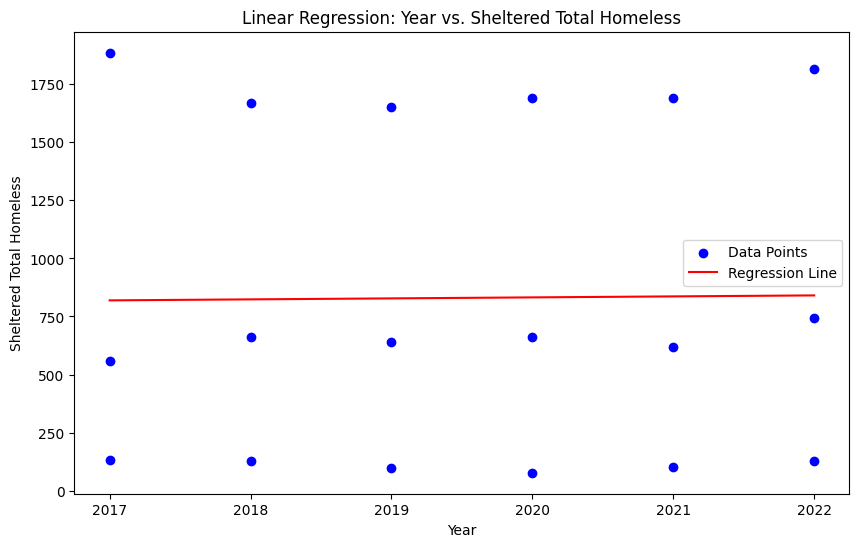

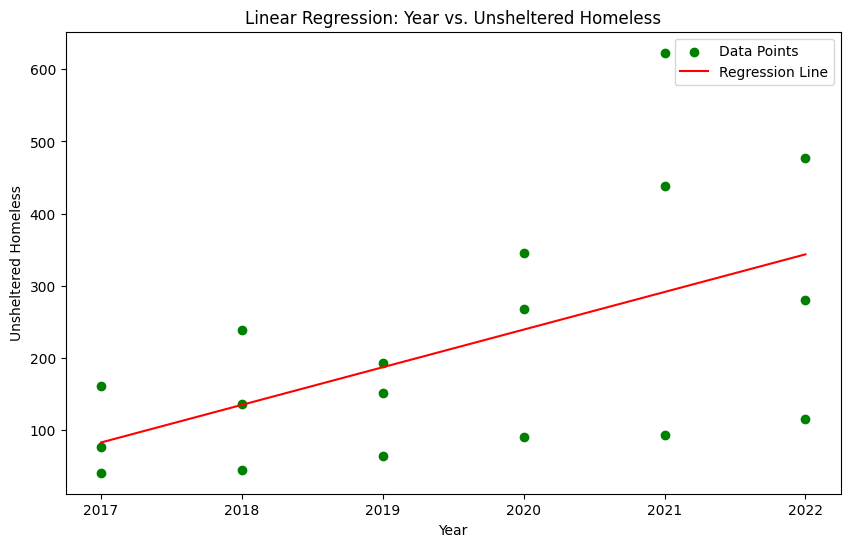

In [12]:
# Has homelessness in Utah changed significantly over the years?

# Linear Regression: Use Year as the independent variable and Sheltered Total Homeless or Unsheltered Homeless as the dependent variable.

import pandas as pd
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Filter for Utah data
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()

# Convert relevant columns to numeric
columns_to_convert = ['Year', 'Sheltered Total Homeless', 'Unsheltered Homeless']
for col in columns_to_convert:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data
utah_df = utah_df.dropna(subset=columns_to_convert)

# Linear Regression for Sheltered Total Homeless
X = sm.add_constant(utah_df['Year'])  # Add constant for intercept
y_sheltered = utah_df['Sheltered Total Homeless']
model_sheltered = sm.OLS(y_sheltered, X).fit()

# Print results for Sheltered
print("Linear Regression: Year vs. Sheltered Total Homeless")
print(f"R-squared: {model_sheltered.rsquared}")
print(f"P-value for Year: {model_sheltered.pvalues['Year']}")
print(f"Coefficient for Year: {model_sheltered.params['Year']}")

# Linear Regression for Unsheltered Homeless
y_unsheltered = utah_df['Unsheltered Homeless']
model_unsheltered = sm.OLS(y_unsheltered, X).fit()

# Print results for Unsheltered
print("\nLinear Regression: Year vs. Unsheltered Homeless")
print(f"R-squared: {model_unsheltered.rsquared}")
print(f"P-value for Year: {model_unsheltered.pvalues['Year']}")
print(f"Coefficient for Year: {model_unsheltered.params['Year']}")


import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Simplified_PIT_data.csv')

# Filter for Utah data
df['CoC Number'] = df['CoC Number'].astype(str).str.strip().str.upper()
utah_df = df[df['CoC Number'].str.startswith('UT-')].copy()

# Convert relevant columns to numeric
columns_to_convert = ['Year', 'Sheltered Total Homeless', 'Unsheltered Homeless']
for col in columns_to_convert:
    utah_df[col] = pd.to_numeric(utah_df[col], errors='coerce')

# Drop rows with missing data
utah_df = utah_df.dropna(subset=columns_to_convert)

# Linear Regression for Sheltered Total Homeless
X = sm.add_constant(utah_df['Year'])  # Add constant for intercept
y_sheltered = utah_df['Sheltered Total Homeless']
model_sheltered = sm.OLS(y_sheltered, X).fit()

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(utah_df['Year'], y_sheltered, color='blue', label='Data Points')
plt.plot(utah_df['Year'], model_sheltered.predict(X), color='red', label='Regression Line')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Sheltered Total Homeless')
plt.title('Linear Regression: Year vs. Sheltered Total Homeless')
plt.legend()

# Show the plot
plt.show()

# Linear Regression for Unsheltered Homeless (you can plot similarly)
y_unsheltered = utah_df['Unsheltered Homeless']
model_unsheltered = sm.OLS(y_unsheltered, X).fit()

# Plot the Unsheltered Homeless regression line
plt.figure(figsize=(10, 6))
plt.scatter(utah_df['Year'], y_unsheltered, color='green', label='Data Points')
plt.plot(utah_df['Year'], model_unsheltered.predict(X), color='red', label='Regression Line')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Unsheltered Homeless')
plt.title('Linear Regression: Year vs. Unsheltered Homeless')
plt.legend()

# Show the plot
plt.show()

